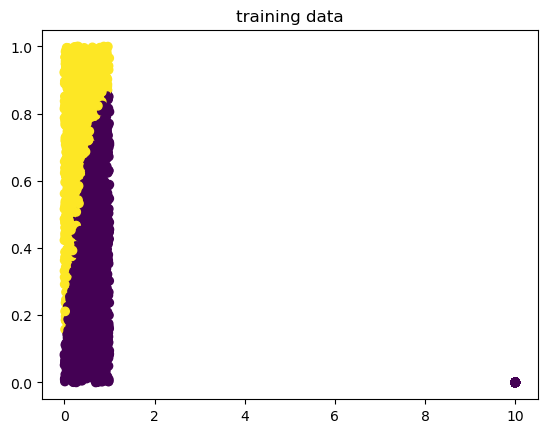

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

### add new data points and labels
new_data_points = np.array([[10, 0]] * 1000)
new_labels = np.array([-1] * 1000).reshape(-1,1)
x_train = np.concatenate((x_train, new_data_points), axis=0)
y_train = np.concatenate((y_train, new_labels), axis=0)
###

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

In [2]:
# Problem 2c

# define the function as derived in problem 2b:

# this is the gradient for a single data point
def gradient(w, x_i, y_i):
    
    w = np.array(w)
    z = -y_i * np.dot(x_i, w) # for simplicity
    grad = (-y_i * x_i * np.exp(z) / (1 + np.exp(z)))
    
    return grad

# sum up the gradients over all data points (+ reg term)
def sum_grad(w):
    
    w = np.array(w)
    total = np.zeros(2)
    n = len(x_train)
    lmda = 1
    reg = 2*lmda*w
    
    for i in range(n):
        part = gradient(w, x_train[i], y_train[i])
        total += part
        
    return total+reg

def logistic(w, x_i, y_i):
    
    w = np.array(w)
    z = -y_i * np.dot(x_i, w) # for simplicity
    return np.log(1 + np.exp(z))


In [3]:
def objective_function(w, method):
    
    lmda = 1
    reg = lmda * np.linalg.norm(w)**2
    
    # This part is for problem 2c
    if(method=="logistic"):
        w = np.array(w)
        total = 0
        n = len(x_train)

        for i in range(n):
            part = logistic(w, x_train[i], y_train[i])
            total += part
        
        return total+reg
    
    #This part is for problem 2e
    if(method=="squares"):
        w = np.array(w)
        term1 = (w.T @ x_train.T @ x_train @ w)
        term2 = (-2 * w.T @ x_train.T @ y_train)
        term3 = (y_train.T @ y_train)
        
        return term1 + term2 + term3 + reg
    
    return 0

In [4]:
# Problem 2c

# Now apply Gradient Descent algorithm
# w(k+1) = w(k) - tau * grad(f(w))

# In this case, tau must be between 0 and 2/||X||op^2
U,s,VT = np.linalg.svd(x_train)
print(s)
print(f"(2/largest sigma's) squared: {2/(s**2)}")
# So, 0 < tau < 0.00175

# Pick tau arbitrarily as half of the upper bound
print(f"Select tau: {(2/(s[0]**2))*0.5}")

[317.25978457  25.69949831]
(2/largest sigma's) squared: [1.98700951e-05 3.02817315e-03]
Select tau: 9.93504754953963e-06


In [5]:
# Problem 2c

def gradient_descent(n, method):
    
    w = np.zeros(2)
    tau = 9.93504754953963e-06  # per commentary above
    
    # This part is for problem 2c
    if(method=="logistic"):
        
        for i in range(n):
            sum_grad_w = sum_grad(w)
            w_new = w - (tau * sum_grad_w)  # update w

            obj_val_prev = objective_function(w, "logistic")
            obj_val_new = objective_function(w_new, "logistic")
            
    #         print(f"w_current: {w}, w_new: {w_new})")
    #         print(f"obj: {obj_val_prev}, obj_new: {obj_val_new}")

    #         if(abs(obj_val_new - obj_val_prev) < tol):
    #             print(f"Objective function value changed less than tolerance, stopping at iteration {i+1}")
    #             break

            if(obj_val_new > obj_val_prev):
                print(f"Objective function value increased, stopping at iteration {i+1}\n and w-value {w_new}")
                break

            w = w_new

        return w
    
    # This part is for problem 2e
    if(method=="squares"):
        
        for i in range(n):
            w = w.reshape(-1,1)
            w_new = w - (tau * (x_train.T @ (x_train @ w - y_train)))
            
            obj_val_prev = objective_function(w, "squares")
            obj_val_new = objective_function(w_new, "squares")
            
#             print(f"w_current: {w}, w_new: {w_new})")
#             print(f"obj: {obj_val_prev}, obj_new: {obj_val_new}")
            
            if(obj_val_new > obj_val_prev):
                w = w_new
                print(f"Objective function value increased, stopping at iteration {i+1}\n and w-value {w_new}")
                break
            
            w = w_new
            
        return w
    
    return 0

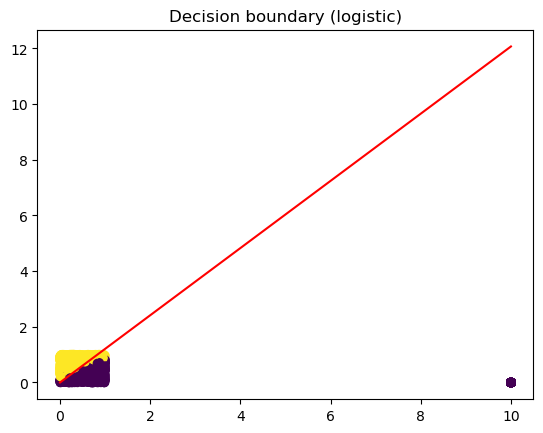

In [6]:
# Problem 2d

w_min_logistic = gradient_descent(10000, "logistic")

x1_values = np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), 100)
x2_values = -w_min_logistic[0]/w_min_logistic[1] * x1_values
plt.plot(x1_values, x2_values, color='red')


n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('Decision boundary (logistic)')y
plt.show()


In [11]:
# Problem 2f Logistic

def error_rate(x_train, y_train, w):
    
    # compute predicted labels
    y_pred = np.sign(np.dot(x_train, w))
    
    # compare predicted labels to true labels
    errors = np.sum(y_pred != y_train[:, 0])
    
    # compute error rate
    error_rate = errors / len(y_train)
    
    return error_rate

# Compute error rate
err_rate_logistic = error_rate(x_train, y_train, w_min_logistic)
print(f"For w values of: {w_min_logistic}")
print(f"The error rate is: {err_rate_logistic}")

For w values of: [-5.51258698  4.56634744]
The error rate is: 0.076


In [12]:
# Problem 2e

# In this case, we can use the Landweber iteration method
# as outlined in the lecture video.
# Thus: w_k+1 = w_k - tau*(X^T (X^T w_k - y))
# (The code for this is built into the functions above 
# when the method parameter "squares" is called

w_min_squares = gradient_descent(1000, "squares")
np.squeeze(w_min_squares.reshape(1,-1))

Objective function value increased, stopping at iteration 987
 and w-value [[-0.10556255]
 [ 0.31533253]]


array([-0.10556255,  0.31533253])

Objective function value increased, stopping at iteration 987
 and w-value [[-0.10556255]
 [ 0.31533253]]


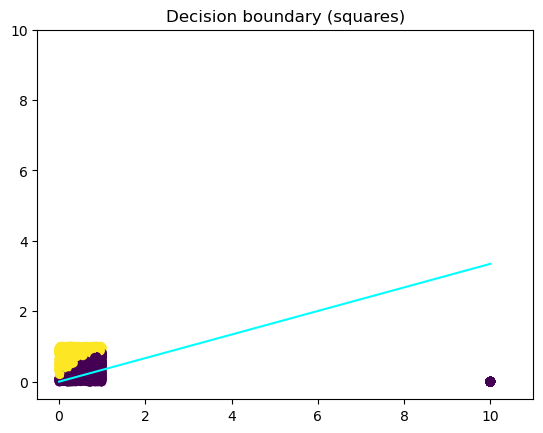

In [15]:
# Problem 2f - LS

w_min_squares = gradient_descent(10000, "squares")

x2_values = -w_min_squares[0]/w_min_squares[1] * x1_values
plt.plot(x1_values, x2_values, color='cyan')

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('Decision boundary (squares)')
plt.xlim(-0.5,11)
plt.ylim(-0.5,10)

plt.show()

# Comment: The decision boundary looks about the same in the base case.

In [10]:
# Problem 2e

# Compute error rate
w_min_squares = np.squeeze(w_min_squares.reshape(1,-1))
err_rate_squares = error_rate(x_train, y_train, w_min_squares)
print(f"For w values of: {w_min_squares}")
print(f"The error rate is: {err_rate_squares}")

# So the two classifiers work equally as well in the base case.

For w values of: [-0.10556255  0.31533253]
The error rate is: 0.3
